# Model 2 Cvec with Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# read in both datasets
harry = pd.read_csv('../Data/yer-a-wizard-Harry.csv')
luke = pd.read_csv('../Data/Luke-After-Yoda.csv')

In [3]:
#reading in new df as df
df = pd.read_csv('../Data/Harry_Skywalker_Bi_Clean.csv')
df.head()

,created_utc,subreddit,combo_text,length,word_count
0,1.697753e+09,0,I find the scene where Hedwig is indignant wit...,615,117
1,1.697736e+09,0,Polyjuice Potion - I'm reading the books again...,670,116
2,1.697733e+09,0,Challenged my friend to the hardest HP trivia ...,887,168
3,1.697726e+09,0,Sometimes it feels exhausted to love an unpopu...,334,56
4,1.697724e+09,0,The Trace - We know all kids under the age of ...,496,88


In [4]:
# using CountVectorizer as cvec for both subreddits to take out stop words
cvec = CountVectorizer(stop_words='english')

In [5]:
# fitting cvec for both datasets and putting into a dataframe, from Lesson 505 
cvec_harry = pd.DataFrame(cvec.fit_transform(df[df.subreddit==0].combo_text).todense(),
                          columns=cvec.get_feature_names_out())
cvec_harry.head()

,00,000,02,026,07,08,090,10,100,1000,...,yugoslavic,yule,z5qwyx0,zacharias,zaney,zero,zi,zograf,zoo,zuko
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cvec_luke = pd.DataFrame(cvec.fit_transform(df[df.subreddit== 1].combo_text).todense(),
                       columns=cvec.get_feature_names_out())
cvec_luke.head()

,000,032,04,05,06,0618,08,09,0bby,0m21s,...,zombified,zone,zoom,zoomed,zu,zur,zusammenhängt,ähnlichen,δαίμων,θεοί
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


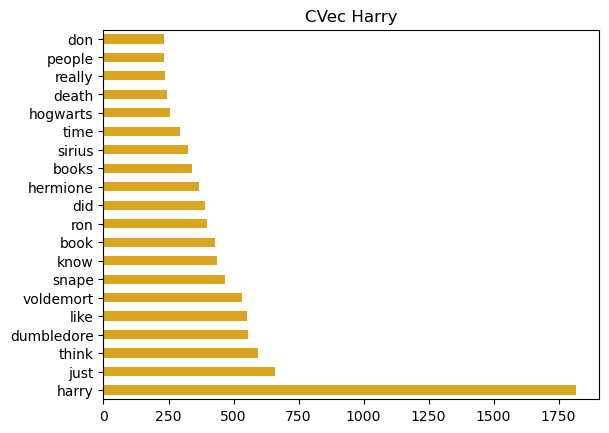

In [25]:
# find most used words in each, then plot for viz
cvec_harry.sum().sort_values(ascending =False)[:20].plot(kind = 'barh', color = 'goldenrod')
plt.title('CVec Harry');

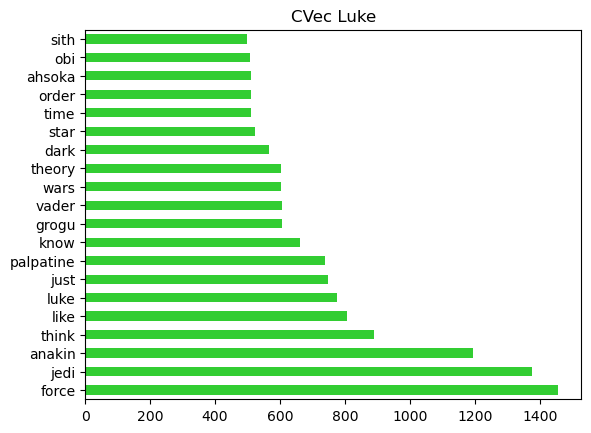

In [26]:
cvec_luke.sum().sort_values(ascending=False)[:20].plot(kind='barh', color = 'limegreen')
plt.title('CVec Luke');

> Just by looking at the bar plots with the top 20 words from the Count Vectorizer, I think this model might fall short of my first model just because some of the words it pulls are generic words and some of the more important words have fallen in ranking in comparison to TVec. Let's split n fit!

In [9]:
#establishing X and y
X = df['combo_text']
y = df['subreddit']

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# make a cvec for the entire X_train to see overall values
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train).todense(),columns = cvec.get_feature_names_out())
X_train_cvec

,00,000,02,026,032,04,05,06,0618,07,...,zone,zoo,zoom,zu,zuko,zur,zusammenhängt,ähnlichen,δαίμων,θεοί
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


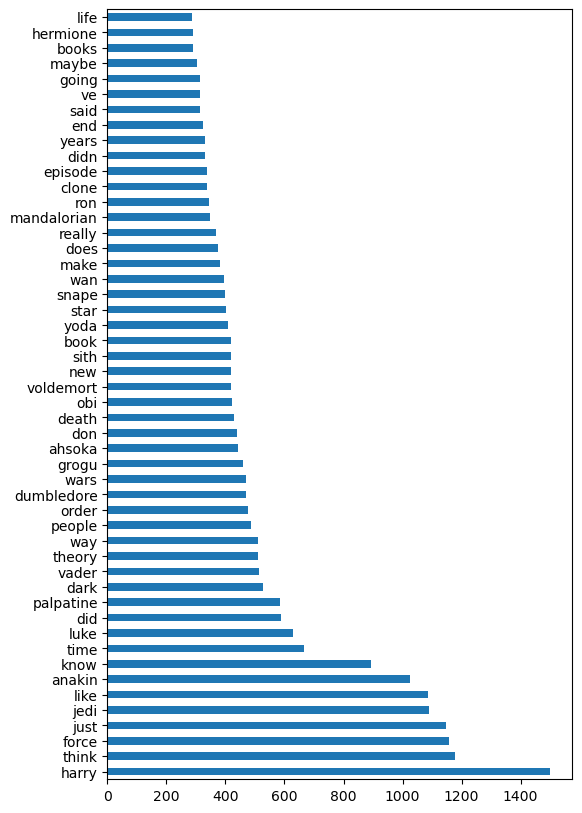

In [12]:
# top 40 words in both reddits combined
plt.figure(figsize =(6,10))
X_train_cvec.sum().sort_values(ascending=False).head(50).plot(kind='barh');

In [13]:
# make pipeline for cvec and Random Forest
cvec_rf_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [14]:
# parameters for cvec and log regression
cvec_rf_pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_est

In [15]:
# input parameters for GridSearch
cvec_rf_params = {
    'cvec__max_features': [3000,6000,9000],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__random_state': [2023]
}

In [16]:
# Instantiate GridSearch
gs_cvec_rf = GridSearchCV(cvec_rf_pipe,
                           param_grid = cvec_rf_params,
                           cv = 5,
                           n_jobs = 4)

In [17]:
# fit GridSearch to training data
gs_cvec_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'cvec__max_features': [3000, 6000, 9000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200],
                         'rf__random_state': [2023]})

In [18]:
# baseline
1-y.mean()

0.5

In [19]:
# train score
gs_cvec_rf.score(X_train, y_train)

1.0

In [20]:
# test score
gs_cvec_rf.score(X_test, y_test)

0.9747474747474747

In [21]:
# which parameters worked best
gs_cvec_rf.best_params_

{'cvec__max_features': 6000,
 'cvec__ngram_range': (1, 2),
 'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 200,
 'rf__random_state': 2023}

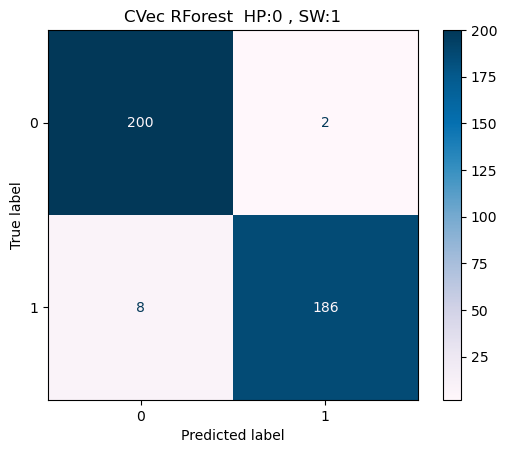

In [28]:
# make predictions and plot to a confusion matrix
preds = gs_cvec_rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap = 'PuBu')
plt.title('CVec RForest  HP:0 , SW:1');

In [23]:
# view for mismatches, Help from Katie
mismatched_indices = (preds != y_test)
mismatched_texts = X_test[mismatched_indices]

for i, text in enumerate(mismatched_texts):
    predicted_label = preds[mismatched_indices][i]
    true_label = y_test.values[mismatched_indices][i]
    print(f"Predicted: {predicted_label} - Actual: {true_label}\n{text}\n")

Predicted: 0 - Actual: 1
Grogu's direct connection to Snoke. On the nose or I'm overthinking here? - 

Predicted: 0 - Actual: 1
Bullet vs blaster bolt - I’ve always wondered which travels faster a bullet or a blaster bolt. An average 9mm travels an average of 102 mph. While a bullet from an ak-47 travels 1500mph(sorry if that’s a bad comparison) and while yes it is possible to dodge a bullet in real life the blaster bolts get evaded quite easily even by regular people. So yeah. Just wondering which is faster

Predicted: 0 - Actual: 1
What do y’all think? - 

Predicted: 0 - Actual: 1
What are the Darkest starwars theories that you have read? - What are the some of the Darkest starwars theories that you have read or heard about? And what makes them so Dark and twisted?
As a bonus; What are some of the darkest starwars rewrites that you have read or heard that you have enjoyed and wished it was canon?

Predicted: 0 - Actual: 1
Lurmen inspired Droidekas - While I don’t have too much to go 

### Conclusion

> This model is also overfit but it missed more predictions than the Tvec/Log regression model. I wanted to run this model to differentiate cvec and tvec. I think for my problem statement tvec will hold up better because it takes importance into consideration (just like Harry and the sorting the hat!)